# Objectif : Entraînement et évaluation du modèle k-Nearest Neighbors pour la classification du dépassement budgétaire

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement des données prétraitées

In [2]:
base = pd.read_csv("pretraitement.csv")

## 2. Séparation des variables explicatives (X) et de la cible (y)

In [3]:
X = base.drop("depassement", axis=1)
X = X.drop(columns=[col for col in X.columns if "libelle" in col])  # On garde uniquement les variables numériques
y = base["depassement"]

## 3. Séparation en jeu d'entraînement et de test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

## 4. Test de plusieurs valeurs de k pour choisir le meilleur

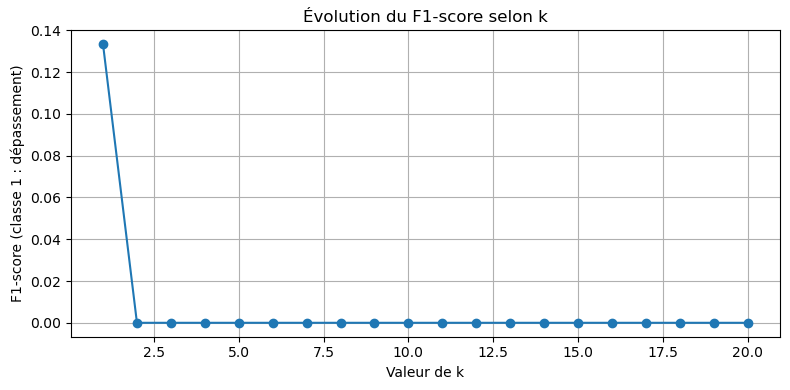

In [5]:
k_values = range(1, 21)
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred_k, zero_division=0)
    f1_scores.append(f1)

plt.figure(figsize=(8, 4))
plt.plot(k_values, f1_scores, marker='o')
plt.title("Évolution du F1-score selon k")
plt.xlabel("Valeur de k")
plt.ylabel("F1-score (classe 1 : dépassement)")
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Entraînement du modèle final avec k=5

In [6]:
knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X_train, y_train)

KNeighborsClassifier()

## 6. Prédictions et évaluation finale

In [7]:
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

print("\n Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\n Rapport de classification :")
print(classification_report(y_test, y_pred, digits=3, zero_division=0))


 Matrice de confusion :
[[174   0]
 [  9   0]]

 Rapport de classification :
              precision    recall  f1-score   support

           0      0.951     1.000     0.975       174
           1      0.000     0.000     0.000         9

    accuracy                          0.951       183
   macro avg      0.475     0.500     0.487       183
weighted avg      0.904     0.951     0.927       183



## 7. Visualisation de la matrice de confusion

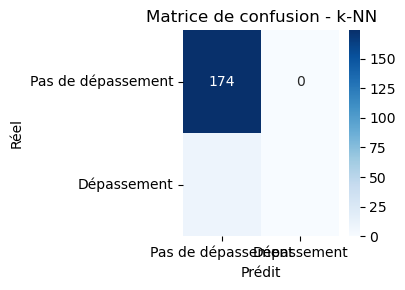

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pas de dépassement", "Dépassement"], yticklabels=["Pas de dépassement", "Dépassement"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - k-NN")
plt.tight_layout()
plt.show()

## 8. Export des résultats

In [9]:
rapport = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
pd.DataFrame(rapport).transpose().to_csv("resultats_knn.csv")
print("\n✅ Rapport enregistré dans resultats_knn.csv")


✅ Rapport enregistré dans resultats_knn.csv
